### Step 0

Copy your compute-bound function and inputs from before.

In [2]:
def crunch_numbers(x):
    y = 0.0
    for i in range(int(x*1e6)):
        y += (i**7)/(i+1)
    return y


%time crunch_numbers(2)

CPU times: user 869 ms, sys: 0 ns, total: 869 ms
Wall time: 871 ms


1.82856716190861e+43

In [3]:
input_data = [2,4,6,8,9,3,6]  # TODO a list of inputs for your `crunch_numbers` function

In [5]:
list(map(crunch_numbers,input_data))

%%time
with ThreadPool(processes=4) as pool:
    results = pool.map(crunch_numbers,input_data)
results

UsageError: Line magic function `%%time` not found.


### Step 1
Use the `(Process)Pool` to parallelize your code. Time it and compare execution times.

In [6]:
from multiprocessing.pool import Pool as ProcessPool

In [7]:
%%time
with ProcessPool(processes=4) as pool:
    results = pool.map(crunch_numbers,input_data)
results
# TODO implement a process-parallel version

CPU times: user 22.2 ms, sys: 11.7 ms, total: 33.9 ms
Wall time: 7.85 s


[1.82856716190861e+43,
 2.340568697906016e+45,
 3.999082603886686e+46,
 2.9959296809450914e+47,
 6.8328093142036e+47,
 3.1242808542886557e+44,
 3.999082603886686e+46]

### Step 2
Now, compare its runtime for different numbers of processes.

In [18]:
from multiprocessing.pool import Pool as ProcessPool
import time
import numpy as np

# TODO replace with meaningful input to your function; keep in mind
# that the "load" on each process should be approximately balanced
# to observe (close to) ideal speedups

def simple(x):
    return x*2

input_data = np.arange(1, 2e5) 

n_processes = np.arange(1, 9)
times = []
for n in n_processes:
    t0 = time.time()
    # TODO implement process-parallel number crunching using a `ProcessPool` **here**
    with ProcessPool(processes=n) as pool:
        results = pool.map(simple,input_data)

    times.append(time.time() - t0)

times
results

[2.0,
 4.0,
 6.0,
 8.0,
 10.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 22.0,
 24.0,
 26.0,
 28.0,
 30.0,
 32.0,
 34.0,
 36.0,
 38.0,
 40.0,
 42.0,
 44.0,
 46.0,
 48.0,
 50.0,
 52.0,
 54.0,
 56.0,
 58.0,
 60.0,
 62.0,
 64.0,
 66.0,
 68.0,
 70.0,
 72.0,
 74.0,
 76.0,
 78.0,
 80.0,
 82.0,
 84.0,
 86.0,
 88.0,
 90.0,
 92.0,
 94.0,
 96.0,
 98.0,
 100.0,
 102.0,
 104.0,
 106.0,
 108.0,
 110.0,
 112.0,
 114.0,
 116.0,
 118.0,
 120.0,
 122.0,
 124.0,
 126.0,
 128.0,
 130.0,
 132.0,
 134.0,
 136.0,
 138.0,
 140.0,
 142.0,
 144.0,
 146.0,
 148.0,
 150.0,
 152.0,
 154.0,
 156.0,
 158.0,
 160.0,
 162.0,
 164.0,
 166.0,
 168.0,
 170.0,
 172.0,
 174.0,
 176.0,
 178.0,
 180.0,
 182.0,
 184.0,
 186.0,
 188.0,
 190.0,
 192.0,
 194.0,
 196.0,
 198.0,
 200.0,
 202.0,
 204.0,
 206.0,
 208.0,
 210.0,
 212.0,
 214.0,
 216.0,
 218.0,
 220.0,
 222.0,
 224.0,
 226.0,
 228.0,
 230.0,
 232.0,
 234.0,
 236.0,
 238.0,
 240.0,
 242.0,
 244.0,
 246.0,
 248.0,
 250.0,
 252.0,
 254.0,
 256.0,
 258.0,
 260.0,
 262.0,
 264.

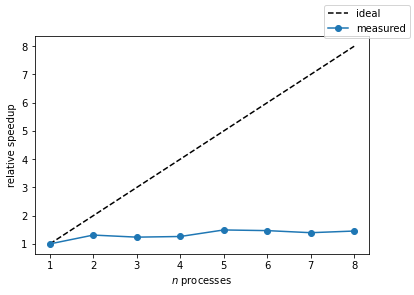

In [19]:
# TODO execute me after the cell above
import matplotlib.pyplot as plt
import numpy as np

times = np.array(times)
fig, axes = plt.subplots()
axes.plot(n_processes, 1.0 * n_processes, color='k', linestyle='--', label='ideal')
axes.plot(n_processes, times[0] / times, marker='o', label='measured')
axes.set_xlabel(r'$n$ processes')
axes.set_ylabel('relative speedup')
fig.legend()

### Step 3 (bonus exercise)
Investigate the speedup for
- short compute-bound functions, i.e., when a single function call doesn't take much time
- unbalanced problems, i.e., scenarios in which most results are fast to compute, but some take long

Discuss.